# Прямоугольная квантовая яма

Одномерный потенциал, равный отрицательной константе на некотором отрезке и нулю в остальных точках вещественной оси. Аналитически он может быть задан формулой
$$ U(x) = \begin{cases}
-U_0, & |x| \leqslant a,\\
0, & |x| > a
\end{cases}\, (1) $$

In [8]:
from scipy import constants
from math import sqrt, ceil, floor, asin, exp, factorial
import matplotlib.pyplot as plt
import numpy as np

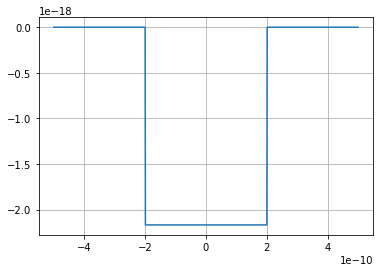

In [5]:
# Потенциальная энергия 13.6 эВ (электрон на первой орбите атома водорода)
U = 2.168e-18

# Ширина ямы
a = 2e-10

def f(U, x, a):
    return -U if (abs(x) < a) else 0

xMin = -5e-10
xMax = 5e-10
x = np.arange(xMin, xMax, 1e-12)

y = []

for i in range(len(x)):
    y.append(f(U, x[i], a))

plt.plot(x, y)
plt.grid()
plt.show()

Вид энергетического спектра частицы в яме
$$ k_2a=\pi n - 2\arcsin (\frac {\hbar k_2}{\sqrt{2 m_0 U_0}}), \, (2)$$
$$ n = 1,2,3,... $$
Так как аргумент функции arcsin не может быть больше единицы значения $k_2$ ограничены величиной $k_2max = \frac 1 \hbar \sqrt{2m_0U_0}$

In [7]:
kMax = 1 / constants.hbar * sqrt(2 * constants.electron_mass * U)
kMax

18845730379.65371

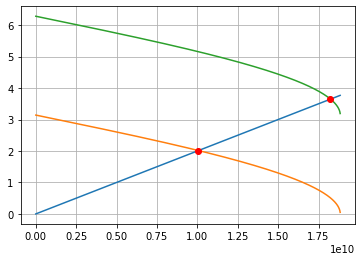

In [13]:
# Графически решим (2)

# Левая часть уравнения
left = np.arange(0, kMax, 1e7) * a

def right_part(n, k_2):
    return constants.pi * n - 2 * asin((constants.hbar * k_2) / sqrt(2 * constants.electron_mass * U))

# Найдем количество видимых правых частей
visibleCurves = ceil(kMax * a / constants.pi)

plt.plot(np.arange(0, kMax, 1e7), left)

for n in range(1, visibleCurves + 1):
    x = []
    y = []
    for k_2 in range(0, int(kMax), int(1e7)):
        x.append(k_2)
        y.append(right_part(n, k_2))
        
    
    plt.plot(x, y)
    for index in range(len(y)):
        if abs(left[index] - y[index]) < 0.003:
            plt.plot(index * 1e7, y[index], 'ro')

plt.grid()
plt.show()

In [15]:
# Построим график осцилляторного потенциала
def pot(omega, x):
    return 0.5 * constants.electron_mass * pow(omega, 2) * pow(x, 2)

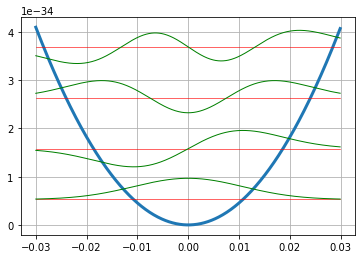

In [22]:
x = np.arange(-3e-2, 3e-2, 1e-4)
y = []
omega = 1
alpha = constants.electron_mass * omega / constants.hbar

for index in range(len(x)):
    y.append(pot(omega, x[index]))

plt.plot(x, y, linewidth=3)

# Функция Эрмитова многочлена
def hermite(n, x):
    array = [0] * n + [1]
    h = np.polynomial.hermite.Hermite(array)
    return h(x * sqrt(alpha))

# График собственных функций осциллографа
def oscillographFunctions(n, x, E):
    points = []
    for index in range(len(x)):
        norm = constants.electron_mass / 150000 # Коэффициент нормализации для графиков
        coefficient = 1 / (sqrt(pow(2, n) * factorial(n))) * pow((alpha / constants.pi), 0.25)
        point = norm * coefficient * exp(-0.5 * alpha * pow(x[index], 2)) * hermite(n, x[index]) + E
        points.append(point)

    return points

# Построим линии энергетических уровней

# Значения энергий (собственные значения)
ownValues = []

n = 0
while True:
    E = (n + 0.5) * constants.hbar * omega
    ownValues.append(E)
    
    if (E > y[0]):
        break
        
    plt.plot(x, [E] * len(x), linewidth=0.6, c='red')
    plt.plot(x, oscillographFunctions(n, x, E), c='green', linewidth = 1)
    n += 1

plt.grid()
plt.show()

#### Вывод
Найдены связные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы; выяснено, что связные состояния дискретны.
Найдены собственные функции и собственные значения для осцилляторного потенциала. Построены графики собственных функций.
Когда в точке $x=0$ вводится бесконечно узкая и бесконечная полупроницаемая перегородка, волновая функция перейдёт на высшее энергетическое состояние.